# Exploratory Data Analysis

In [1]:
import sys
sys.path.append("..")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import math

In [2]:
"""
Read in the initial cohort
"""
initial_cohort = pd.read_csv("../data/initial_cohort_final.csv", index_col=0)

In [3]:
"""
Columns names and checking for NA values
"""
missing_values = initial_cohort.isna().sum()
print(missing_values)

subject_id            0
hadm_id               0
stay_id               0
n_stays               0
sum_los               0
                  ...  
norepinephrine    16959
phenylephrine     17095
vasopressin       20378
dobutamine        21710
milrinone         21253
Length: 67, dtype: int64


In [4]:
"""
Descriptive statistics
"""
initial_cohort.describe(include="all")

,subject_id,hadm_id,stay_id,n_stays,sum_los,gender,admission_age,suspected_infection,admission_type,weight,...,sofa,ventilation_status,urineoutput,dopamine,epinephrine,norepinephrine,phenylephrine,vasopressin,dobutamine,milrinone
count,2.207100e+04,2.207100e+04,2.207100e+04,22071.000000,22071.000000,22071,22071.000000,18017.000000,22071,21158.000000,...,22071.000000,20196,21566.000000,465.000000,1842.000000,5112.000000,4976.000000,1693.000000,361.000000,818.000000
unique,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,8,NaN,...,NaN,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,M,NaN,NaN,EW EMER.,NaN,...,NaN,SupplementalOxygen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,12838,NaN,NaN,10176,NaN,...,NaN,10759,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.500442e+07,2.498760e+07,3.496145e+07,1.429704,10.077974,NaN,60.791083,0.940168,NaN,87.046797,...,6.197499,NaN,1905.505657,77.228820,0.719172,2.583992,14.583995,42.112632,46.825632,5.537971
std,2.903088e+06,2.882473e+06,2.900560e+06,0.741137,8.996689,NaN,16.009583,0.237183,NaN,27.071463,...,3.857264,NaN,1307.023634,131.950262,1.371509,4.356997,26.435675,35.363039,62.380004,5.838874
min,1.000235e+07,2.000136e+07,3.000015e+07,1.000000,3.300000,NaN,18.000000,0.000000,NaN,1.000000,...,0.000000,NaN,-1590.000000,1.500451,0.008003,0.010001,0.050001,0.960000,0.500015,0.125004
25%,1.245921e+07,2.253333e+07,3.245194e+07,1.000000,4.540000,NaN,51.000000,1.000000,NaN,70.000000,...,3.000000,NaN,1047.000000,15.012234,0.160019,0.400040,2.273994,15.600198,7.496755,1.876385
50%,1.505582e+07,2.497613e+07,3.490782e+07,1.000000,6.790000,NaN,63.000000,1.000000,NaN,83.000000,...,6.000000,NaN,1645.000000,34.520197,0.376142,1.190748,6.503536,32.430477,20.029645,4.397760
75%,1.752885e+07,2.746342e+07,3.745038e+07,2.000000,12.040000,NaN,73.000000,1.000000,NaN,99.400000,...,9.000000,NaN,2468.750000,81.972970,0.819917,3.013383,16.710587,58.891999,59.458640,7.379839


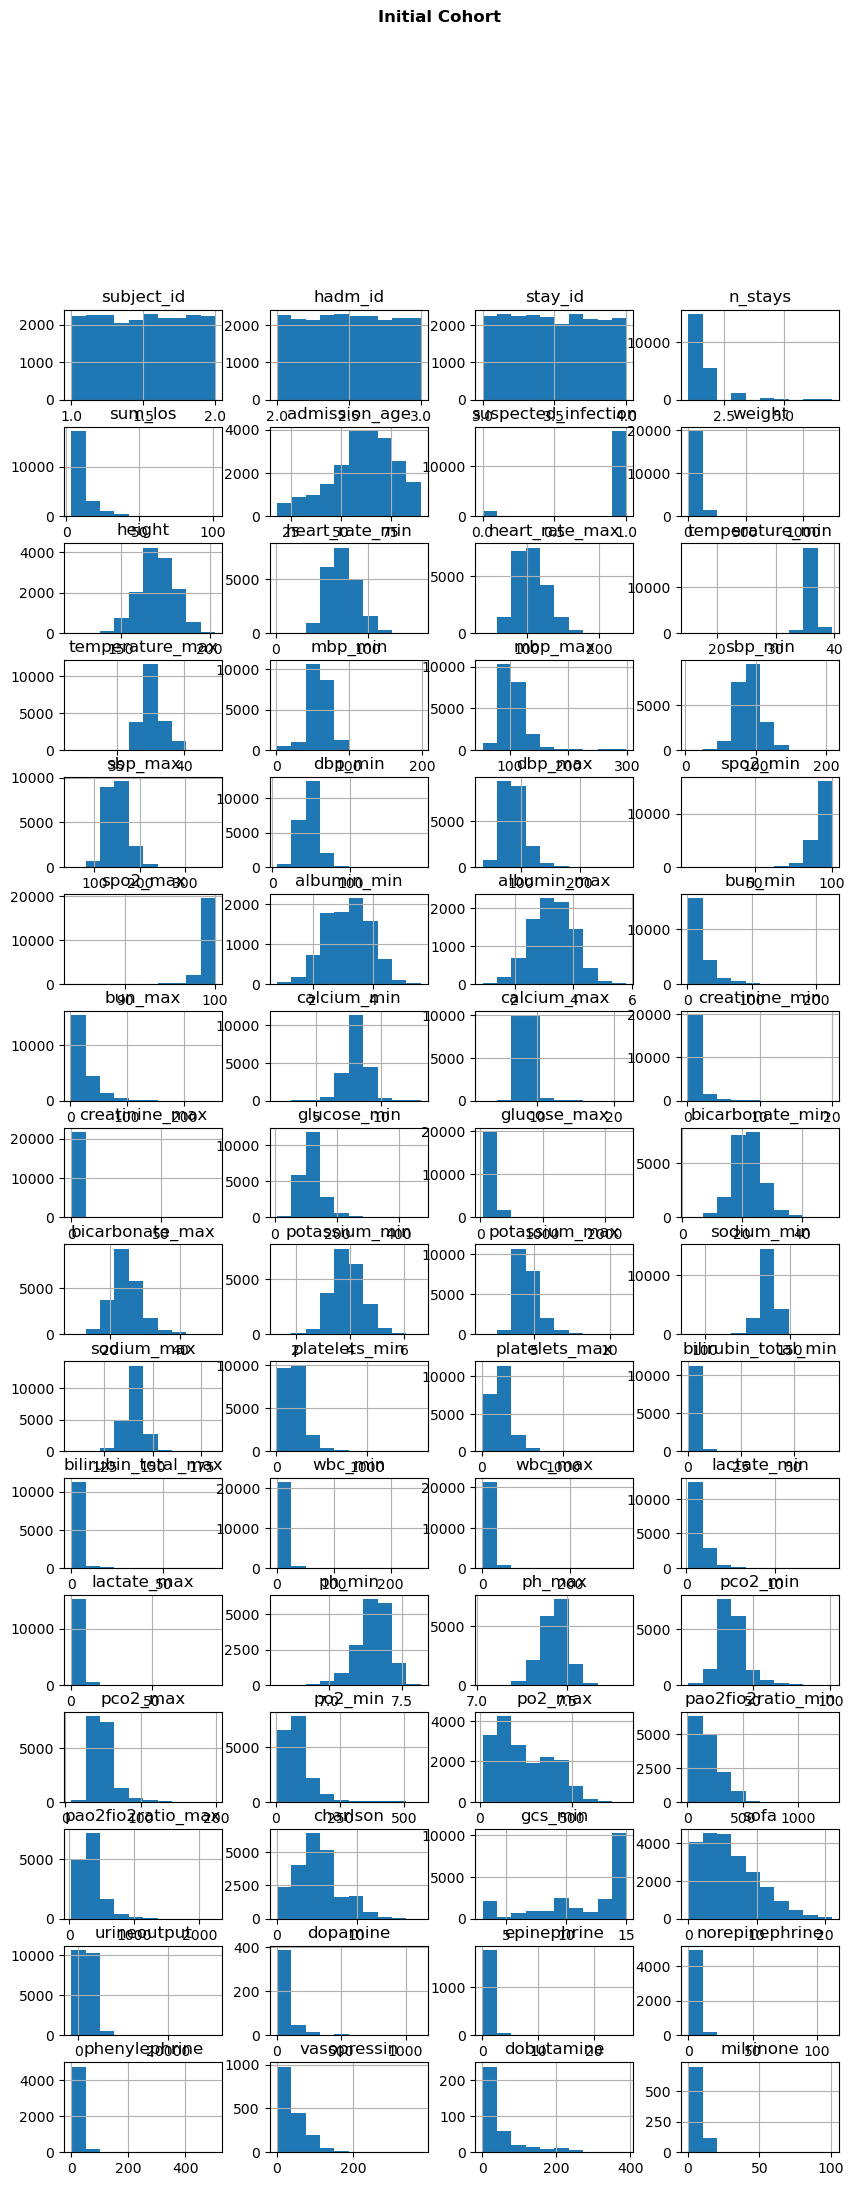

In [5]:
def plot_df_histogram(df, title:str, figsize:tuple=(10,4), **kwargs):
    """
    Plots a histogram from the dataframe
    
    Args:
        df (DataFrame)
        title (str): Title for the plot
        figsize (tuple): Size of the figure to pass to pyplot.figure
    """
    df.hist(figsize=figsize, **kwargs)
    plt.suptitle(title, fontweight="semibold")
    plt.show()

plot_df_histogram(
    initial_cohort,
    title="Initial Cohort",
    figsize=(10, 30),
    layout=(20,4)
)

Column gender is not numeric
Column admission_type is not numeric
Column ventilation_status is not numeric
Column vasopressin is not numeric
Column dobutamine is not numeric
Column milrinone is not numeric


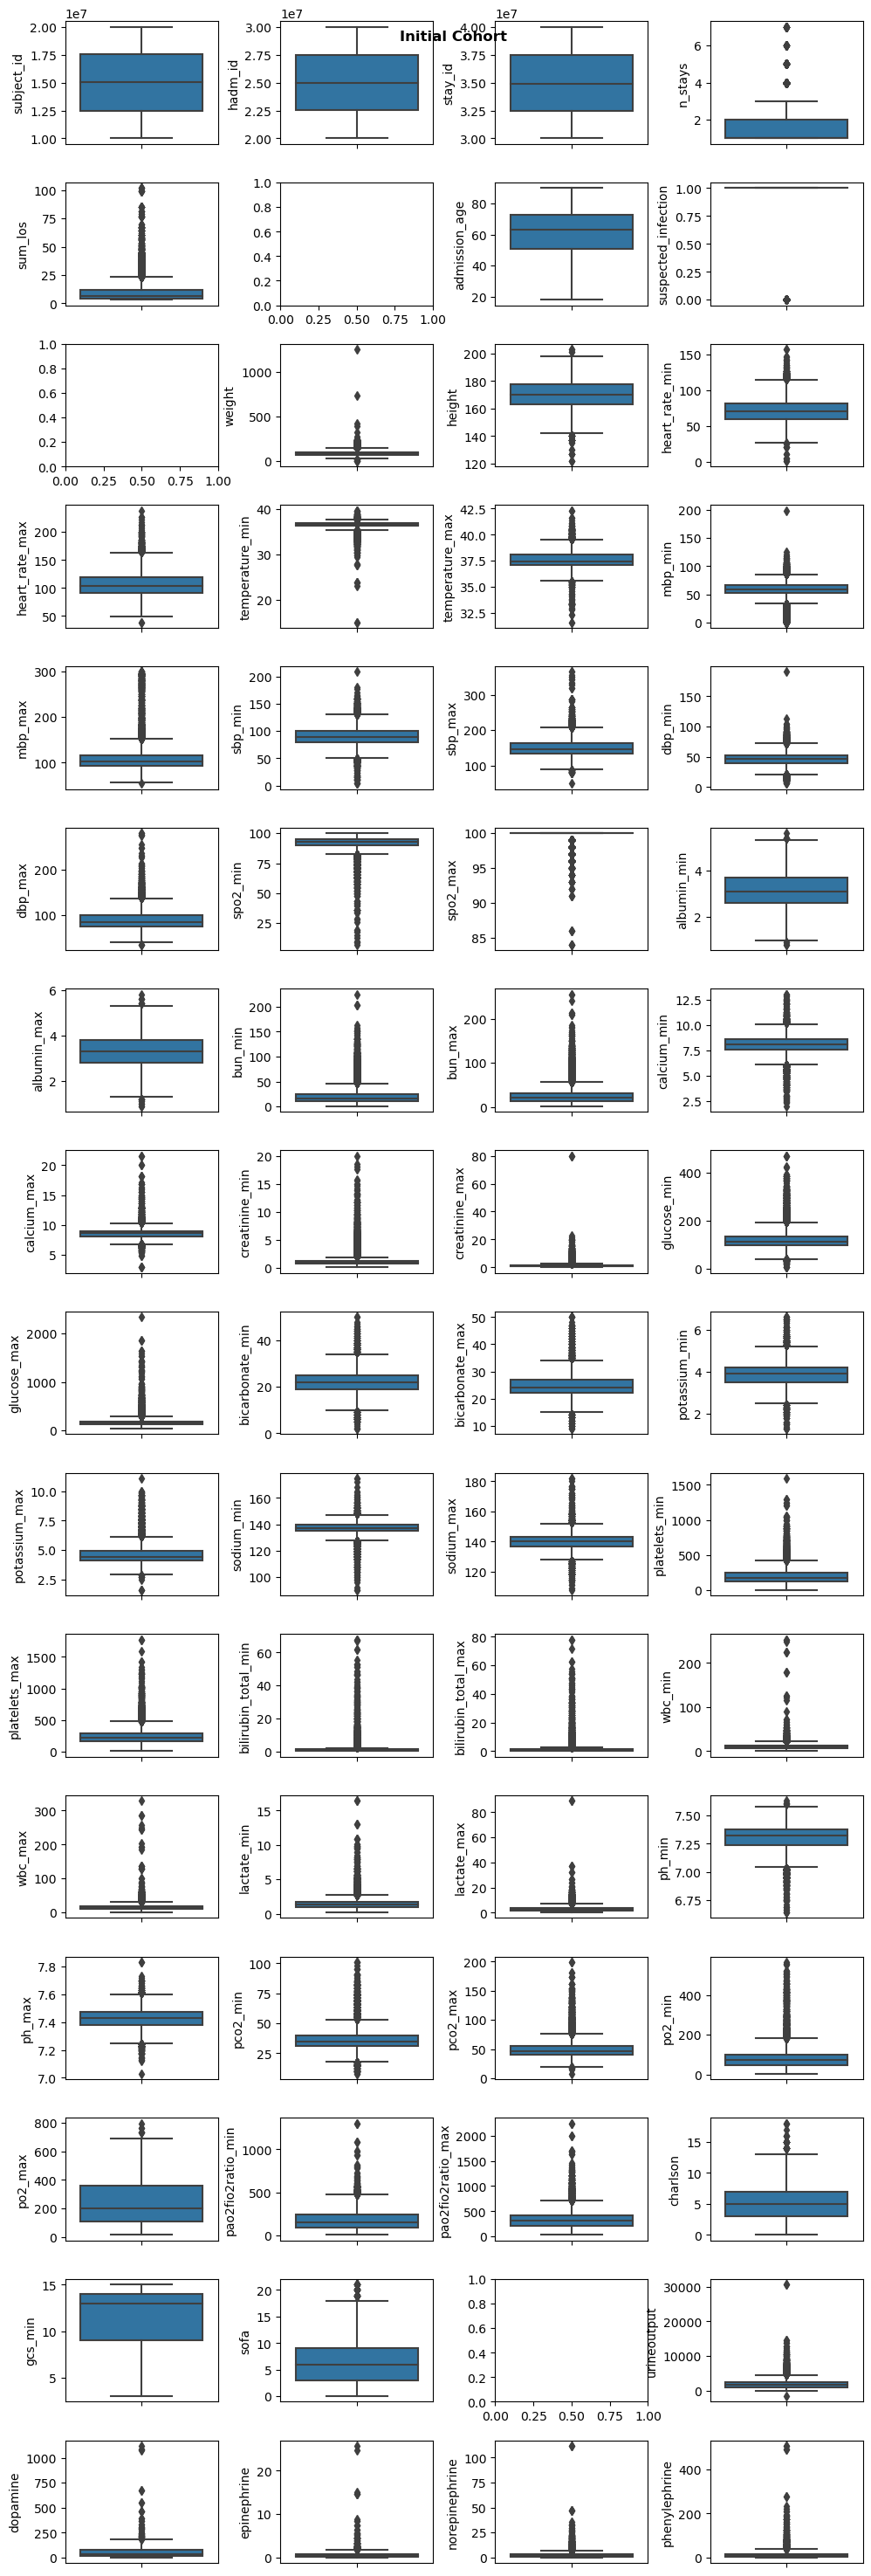

In [6]:
def plot_cohort_statistics(df, title:str, layout=(1, 4), figsize=(10,10)):
    """
    Use a boxplot to visualise the numerical features
    
    Args:
        df (DataFrame)
        title (str): Title for the plot
    """
    row, col = layout
    width, height = figsize
    fig, axs = plt.subplots(row, col)
    fig.set_size_inches(width, height)
    fig.suptitle(title, fontweight="semibold")
    fig.tight_layout()
    
    df_plt = df.copy()

    for i, column in enumerate(df_plt):
        r = math.floor(i / col)
        c = i % col
        try:
            sns.boxplot(y=df_plt[column], ax=axs[r][c])
        except:
            print(f"Column {column} is not numeric")
            continue
    
    plt.show()

plot_cohort_statistics(
    initial_cohort,
    title="Initial Cohort",
    figsize=(10, 30),
    layout=(16,4)
)